In [1]:
#install necessary libraries for distance and dimensionality reduction tasks

IS_COLAB = True

if IS_COLAB:
    !pip install tcrdist3
    !pip install umap-learn
    !pip install umap-learn[plot]

In [2]:
if IS_COLAB:
    from google.colab import drive

    drive.mount('/content/drive')
    %ls
    %cd drive/MyDrive/dsmp-2024-groupol1/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
drive/  sample_data/
/content/drive/MyDrive/dsmp-2024-groupol1


In [3]:
import pandas as pd

df = pd.read_csv('data/vdjdb.txt', sep="\t")


selected_features = df[['gene','cdr3','v.segm','j.segm','species','mhc.a','mhc.b','mhc.class','antigen.epitope','antigen.species','vdjdb.score', 'complex.id']]

# Select all human data
human_data = selected_features[(selected_features['species'] == 'HomoSapiens')]

# Drop duplicate rows
human_data_cols = human_data.columns.difference(['complex.id', 'vdjdb.score'])
print(human_data_cols)
human_data = human_data.drop_duplicates(subset=human_data_cols)

# Delete rows with null values
human_data  = human_data.dropna()
# Print all data
human_data.head()

Index(['antigen.epitope', 'antigen.species', 'cdr3', 'gene', 'j.segm', 'mhc.a',
       'mhc.b', 'mhc.class', 'species', 'v.segm'],
      dtype='object')


,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,antigen.species,vdjdb.score,complex.id
0,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,HIV-1,2,1
1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,HIV-1,2,1
2,TRB,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,HIV-1,2,0
3,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,HIV-1,2,2
4,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,HIV-1,2,2


In [4]:
antigen_epitope_dummies = pd.get_dummies(human_data['antigen.epitope'], dtype = int)[['ATDALMTGY', 'ELAGIGILTV', 'GILGFVFTL', 'GLCTLVAML', 'KRWIILGLNK', 'NLVPMVATV', 'RAKFKQLL']]

In [5]:
human_data = pd.concat([human_data, antigen_epitope_dummies], axis = 1)

In [6]:
TRB = human_data[human_data['gene'] =='TRB']
# rename the columns for our beta chain matrix calculation
beta_chains = TRB[['cdr3', 'v.segm', 'j.segm', 'antigen.epitope', 'vdjdb.score', 'ATDALMTGY', 'ELAGIGILTV', 'GILGFVFTL', 'GLCTLVAML', 'KRWIILGLNK', 'NLVPMVATV', 'RAKFKQLL']]
beta_chains.rename(columns={'cdr3':'cdr3_b_aa','v.segm':'v_b_gene', 'j.segm':'j_b_gene'}, inplace=True)
beta_chains

<ipython-input-6-c4851281fdd3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beta_chains.rename(columns={'cdr3':'cdr3_b_aa','v.segm':'v_b_gene', 'j.segm':'j_b_gene'}, inplace=True)


,cdr3_b_aa,v_b_gene,j_b_gene,antigen.epitope,vdjdb.score,ATDALMTGY,ELAGIGILTV,GILGFVFTL,GLCTLVAML,KRWIILGLNK,NLVPMVATV,RAKFKQLL
1,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,FLKEKGGL,2,0,0,0,0,0,0,0
2,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01,FLKEKGGL,2,0,0,0,0,0,0,0
4,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,FLKEKGGL,2,0,0,0,0,0,0,0
6,CASSYEPGQVSHYSNQPQHF,TRBV13*01,TRBJ1-5*01,FLKEKGGL,2,0,0,0,0,0,0,0
8,CASSALASLNEQFF,TRBV14*01,TRBJ2-1*01,FLKEKGGL,2,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
92754,CASSFRSTDTQYF,TRBV7-3*01,TRBJ2-3*01,PQPELPYPQPQL,0,0,0,0,0,0,0,0
92762,CASSVRSTDTQYF,TRBV7-2*01,TRBJ2-3*01,PQPELPYPQPQL,0,0,0,0,0,0,0,0
92766,CASSPGQGGDNEQFF,TRBV7-3*01,TRBJ2-1*01,PQQPFPQPEQPFP,0,0,0,0,0,0,0,0
92768,CASSLGAGGQETQYF,TRBV5-1*01,TRBJ2-5*01,PQQPFPQPEQPFP,2,0,0,0,0,0,0,0


In [7]:
beta_chains['antigen.epitope'].value_counts()

antigen.epitope
KLGGALQAK           12740
NLVPMVATV            4776
GILGFVFTL            3739
AVFDRKSDAK           1652
ELAGIGILTV           1444
                    ...  
KAYDVTQAF               1
RPPLNRNYV               1
APYIVGDVV               1
SPLPSYAAF               1
APSGEGSFQPSQENPQ        1
Name: count, Length: 1099, dtype: int64

In [8]:
#dummy_preproc = beta_chains.groupby('cdr3_b_aa')[['ATDALMTGY', 'ELAGIGILTV', 'GILGFVFTL', 'GLCTLVAML', 'KRWIILGLNK', 'NLVPMVATV', 'RAKFKQLL']].sum().reset_index()
#beta_chains_proc = pd.merge(beta_chains[['cdr3_b_aa',	'v_b_gene',	'j_b_gene',	'antigen.epitope']], dummy_preproc, how = 'left', on = 'cdr3_b_aa').drop_duplicates(subset = ['cdr3_b_aa'])
#beta_chains_proc.reset_index(inplace = True)

In [9]:
beta_chains_proc = beta_chains

In [10]:
condition = (
    (beta_chains_proc['ATDALMTGY'] == 0) &
    (beta_chains_proc['ELAGIGILTV'] == 0) &
    (beta_chains_proc['GILGFVFTL'] == 0) &
    (beta_chains_proc['GLCTLVAML'] == 0) &
    (beta_chains_proc['KRWIILGLNK'] == 0) &
    (beta_chains_proc['NLVPMVATV'] == 0) &
    (beta_chains_proc['RAKFKQLL'] == 0)
)

# Drop the rows where the condition is True
beta_chains_proc = beta_chains_proc[~condition]
beta_chains_proc.shape

(12573, 12)

In [11]:
beta_chains_proc['vdjdb.score'].value_counts()

vdjdb.score
0    11175
1      747
2      390
3      261
Name: count, dtype: int64

In [12]:
import numpy as np

filtered_indices = beta_chains_proc[beta_chains_proc['vdjdb.score']==0].index
selected_indices = np.random.choice(filtered_indices, size=9500, replace=False)

beta_chains_proc = beta_chains_proc.drop(selected_indices)
beta_chains_proc.shape

(3073, 12)

In [13]:
beta_chains_proc['classifer'] = beta_chains_proc['vdjdb.score'].apply(lambda x: 1 if x>0 else 0)

In [14]:
beta_chains_proc

,cdr3_b_aa,v_b_gene,j_b_gene,antigen.epitope,vdjdb.score,ATDALMTGY,ELAGIGILTV,GILGFVFTL,GLCTLVAML,KRWIILGLNK,NLVPMVATV,RAKFKQLL,classifer
683,CASSPQGLGTEAFF,TRBV28*01,TRBJ1-1*01,ELAGIGILTV,1,0,1,0,0,0,0,0,1
711,CASSLSGSGDEQFF,TRBV5-1*01,TRBJ2-1*01,ELAGIGILTV,0,0,1,0,0,0,0,0,0
720,CSALQGLTPEAFF,TRBV20-1*01,TRBJ1-1*01,ELAGIGILTV,0,0,1,0,0,0,0,0,0
728,CASSEAELLSSYNEQFF,TRBV6-1*01,TRBJ2-1*01,ELAGIGILTV,0,0,1,0,0,0,0,0,0
737,CASSDSTASSEQFF,TRBV27*01,TRBJ2-1*01,ELAGIGILTV,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90095,CSAGSGGTNEKLFF,TRBV29-1*01,TRBJ1-4*01,GLCTLVAML,0,0,0,0,1,0,0,0,0
90109,CASSSLNTEAFF,TRBV27*01,TRBJ1-1*01,RAKFKQLL,0,0,0,0,0,0,0,1,0
90114,CASSPGQGEGYEQYF,TRBV4-1*01,TRBJ2-7*01,RAKFKQLL,0,0,0,0,0,0,0,1,0
90121,CASTGTASTDTQYF,TRBV6-1*01,TRBJ2-3*01,RAKFKQLL,0,0,0,0,0,0,0,1,0


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(beta_chains_proc, test_size = 0.2, stratify = beta_chains_proc['classifer'])

In [16]:
X_train

,cdr3_b_aa,v_b_gene,j_b_gene,antigen.epitope,vdjdb.score,ATDALMTGY,ELAGIGILTV,GILGFVFTL,GLCTLVAML,KRWIILGLNK,NLVPMVATV,RAKFKQLL,classifer
18328,CASSALQGPSQPQHF,TRBV7-8*01,TRBJ1-5*01,GILGFVFTL,0,0,0,1,0,0,0,0,0
69075,CASSFRSTDTQYF,TRBV19*02,TRBJ2-3*01,GILGFVFTL,1,0,0,1,0,0,0,0,1
75102,CASSVVSDNEQFF,TRBV9*01,TRBJ2-1*01,KRWIILGLNK,1,0,0,0,0,1,0,0,1
10172,CASSLPTEQETQYF,TRBV7-9*01,TRBJ2-5*01,NLVPMVATV,0,0,0,0,0,0,1,0,0
75094,CASSQGTSDYEQYF,TRBV4-3*01,TRBJ2-7*01,KRWIILGLNK,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10524,CASSESLGNTGELFF,TRBV2*01,TRBJ2-2*01,NLVPMVATV,0,0,0,0,0,0,1,0,0
25787,CASSLIGGRNGYTF,TRBV7-9*01,TRBJ1-2*01,NLVPMVATV,2,0,0,0,0,0,1,0,1
76071,CASSGGTGVFYEQYF,TRBV7-9*01,TRBJ2-7*01,KRWIILGLNK,0,0,0,0,0,1,0,0,0
9973,CSVVKPNTGELFF,TRBV29-1*01,TRBJ2-2*01,NLVPMVATV,0,0,0,0,0,0,1,0,0


In [17]:
from sklearn.decomposition import PCA
from tcrdist.repertoire import TCRrep

tr = TCRrep(cell_df = X_train,
            organism = 'human',
            chains = ['beta'],
            db_file = 'alphabeta_gammadelta_db.tsv')

tr

/usr/local/lib/python3.10/dist-packages/tcrdist/repertoire.py:159: UserWarning: cell_df needs a counts column to track clonal number of frequency

  self._validate_cell_df()
/usr/local/lib/python3.10/dist-packages/tcrdist/repertoire.py:791: UserWarning: No 'count' column provided; count column set to 1
  warnings.warn("No 'count' column provided; count column set to 1")


In [30]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df_train = pd.DataFrame(tr.pw_cdr3_b_aa)
scaler = StandardScaler()

scaler.fit(df_train)
df_train = scaler.transform(df_train)
PCA_model = PCA(n_components = 100)
reduced_pca = PCA_model.fit(df_train)



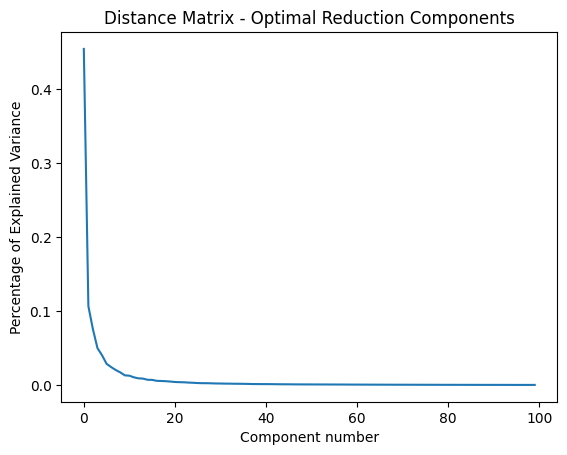

In [38]:
plt.plot(range(0, 100), reduced_pca.explained_variance_ratio_)
plt.xlabel("Component number")
plt.ylabel("Percentage of Explained Variance")
plt.title("Distance Matrix - Optimal Reduction Components")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

df_train = pd.DataFrame(tr.pw_cdr3_b_aa)
scaler = StandardScaler()
scaler.fit(df_train)
df_train = scaler.transform(df_train)
PCA_model = PCA(n_components = 30)
reduced_pca = PCA_model.fit_transform(df_train)
#, tr.clone_df[['ATDALMTGY', 'ELAGIGILTV', 'GILGFVFTL', 'GLCTLVAML', 'KRWIILGLNK', 'NLVPMVATV', 'RAKFKQLL']]], axis = 1)

In [ ]:
X_train_scaled = np.hstack((reduced_pca,
                           tr.clone_df[['ATDALMTGY', 'ELAGIGILTV', 'GILGFVFTL', 'GLCTLVAML', 'KRWIILGLNK', 'NLVPMVATV', 'RAKFKQLL']].values))

X_train_scaled.shape

(2449, 37)

In [ ]:
y_train = tr.clone_df['classifer']
y_train.shape

(2449,)

In [ ]:
test_tcrs = TCRrep(cell_df=X_test,
                   organism='human',
                   chains=['beta'],
                   deduplicate=True)

test_tcrs.compute_rect_distances(df=test_tcrs.clone_df,
                                    df2=tr.clone_df)

/usr/local/lib/python3.10/dist-packages/tcrdist/repertoire.py:159: UserWarning: cell_df needs a counts column to track clonal number of frequency

  self._validate_cell_df()
/usr/local/lib/python3.10/dist-packages/tcrdist/repertoire.py:791: UserWarning: No 'count' column provided; count column set to 1
  warnings.warn("No 'count' column provided; count column set to 1")


In [ ]:
df_test = scaler.transform(test_tcrs.rw_cdr3_b_aa)
PCA_model = PCA(n_components = 30)
reduced_pca_test = PCA_model.fit_transform(df_test)
X_test_scaled = np.hstack((reduced_pca_test,
                           test_tcrs.clone_df[['ATDALMTGY', 'ELAGIGILTV', 'GILGFVFTL', 'GLCTLVAML', 'KRWIILGLNK', 'NLVPMVATV', 'RAKFKQLL']].values))

In [ ]:
y_test = test_tcrs.clone_df['classifer']

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

param_grid = {
    'n_neighbors': [3, 5, 7, 10, 15, 20, 25, 30],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean']
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Display the best parameters and the score of the best model
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test_scaled)

accuracy_score(y_pred, y_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters: {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}
Best score: 0.5679712866741788


0.5700325732899023

In [ ]:
print(y_pred.shape)
print(y_test.shape)
print(test_tcrs.clone_df['antigen.epitope'].shape)
eval_df = pd.concat([pd.Series(y_pred), y_test], axis = 1)
eval_df.rename(columns = {0: 'Predicted', 'classifer': 'Actual'}, inplace = True)

eval_df['Epitope'] = test_tcrs.clone_df['antigen.epitope']
eval_df

(614,)
(614,)
(614,)


,Predicted,Actual,Epitope
0,0,0,NLVPMVATV
1,0,1,GLCTLVAML
2,0,0,KRWIILGLNK
3,0,0,GILGFVFTL
4,0,0,GILGFVFTL
...,...,...,...
609,0,0,NLVPMVATV
610,0,1,GLCTLVAML
611,0,1,RAKFKQLL
612,0,1,NLVPMVATV


In [ ]:
eval_df['Correct'] = eval_df.apply(lambda x: 'Correct' if x['Predicted'] == x ['Actual'] else 'Incorrect', axis = 1)
eval_df.groupby('Epitope')['Correct'].value_counts()

Epitope     Correct  
ATDALMTGY   Incorrect     12
            Correct        6
ELAGIGILTV  Correct       39
            Incorrect     28
GILGFVFTL   Correct       96
            Incorrect     55
GLCTLVAML   Correct       38
            Incorrect     21
KRWIILGLNK  Incorrect     25
            Correct       16
NLVPMVATV   Correct      133
            Incorrect     83
RAKFKQLL    Incorrect     40
            Correct       22
Name: count, dtype: int64

In [ ]:
eval_df.groupby('Actual')['Correct'].value_counts()

Actual  Correct  
0       Correct      263
        Incorrect     72
1       Incorrect    192
        Correct       87
Name: count, dtype: int64

In [ ]:
eval_df['VDJD_SCORE'] = test_tcrs.clone_df['vdjdb.score']
eval_df

,Predicted,Actual,Epitope,Correct,VDJD_SCORE
0,0,0,NLVPMVATV,Correct,0
1,0,1,GLCTLVAML,Incorrect,2
2,0,0,KRWIILGLNK,Correct,0
3,0,0,GILGFVFTL,Correct,0
4,0,0,GILGFVFTL,Correct,0
...,...,...,...,...,...
609,0,0,NLVPMVATV,Correct,0
610,0,1,GLCTLVAML,Incorrect,1
611,0,1,RAKFKQLL,Incorrect,1
612,0,1,NLVPMVATV,Incorrect,1


In [ ]:
eval_df.groupby('VDJD_SCORE')['Correct'].value_counts()

VDJD_SCORE  Correct  
0           Correct      263
            Incorrect     72
1           Incorrect    108
            Correct       39
2           Incorrect     52
            Correct       30
3           Incorrect     32
            Correct       18
Name: count, dtype: int64